In [135]:
import pandas as pd
import numpy as np
from collections import Counter

from scipy.cluster.hierarchy import dendrogram, linkage
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Prep data

In [136]:
flavors = {
  "Berries": [
    "Blackcurrant",
    "Redcurrant",
    "Blueberry",
    "Raspberry",
    "Blackberry",
    "Cassis",
    "Gooseberry",
    "Cranberry",
    "Damson",
    "Sour Cherry",
    "Black Cherry",
    "Red Cherry"
  ],
  "Citrus": [
    "Lemon",
    "Lime",
    "Grapefruit",
    "Orange",
    "Orange Marmalade"
  ],
  "Stone Fruits": [
    "Plum",
    "Black Plum",
    "Red Plum",
    "Apricot",
    "Peach",
    "Nectarine",
    "Quince",
    "Stone Fruit"
  ],
  "Tree Fruits": [
    "Green Apple",
    "Red Apple",
    "Pear",
    "Grape",
    "Ripe Fruit",
    "Green Fruit",
  ],
  "Tropical Fruit": [
    "Watermelon",
    "Melon",
    "Mango",
    "Pineapple",
    "Banana",
    "Passionfruit",
    "Lychee",
    "Coconut",
    "Tropical Fruit"
  ],
  "Dried & Cooked Fruits": [
    "Dried Fruit",
    "Date",
    "Raisin",
    "Fig",
    "Candied Fruit",
    "Jammy",
    "Cooked Fruit"
  ],
  "Floral": [
    "Floral",
    "Blossom",
    "Rose",
    "Elderflower",
    "Honeysuckle",
    "Violet"
  ],
  "Herbal & Vegetal": [
    "Herbaceous",
    "Herbal",
    "Dried Herbs",
    "Grass",
    "Green Bell Pepper",
    "Asparagus",
    "Eucalyptus",
    "Mint"
  ],
  "Nuts & Seeds": [
    "Almond",
    "Hazelnut",
    "Walnut"
  ],
  "Spices": [
    "Spice",
    "Sweet Spice",
    "Cinnamon",
    "Nutmeg",
    "Cloves",
    "Ginger",
    "White Pepper",
    "Black Pepper",
    "Liquorice"
  ],
  "Sweet & Confection": [
    "Honey",
    "Vanilla",
    "Caramel",
    "Chocolate",
    "Cocoa",
    "Butter",
    "Cream"
  ],
  "Bakery": [
    "Bread",
    "Bread Dough",
    "Pastry",
    "Biscuit",
    "Toast"
  ],
  "Woody & roasted": [
    "Cedar",
    "Cigar Box",
    "Charred Wood",
    "Tobacco",
    "Leather",
    "Coffee",
    "Petrol"
    "Smoke",
    "Coffee",
    "Charred Wood"
  ],
  "Earthy": [
    "Earth",
    "Forest Floor",
    "Wet Stones",
    "Flint",
    "Mineral"
  ],
  "Other": [
    "Savoury",
    "Game"
  ]
}

category_colors = {
    'Citrus': '#FFC107',
    'Floral': '#EE4266',
    'Earthy': 'brown',
    'Nuts & Seeds': '#97866A',
    'Tropical Fruit': 'yellow',
    'Herbal & Vegetal': '#6F8F3C',
    'Bakery': 'beige',
    'Other': 'gray',
    'Dried & Cooked Fruits': '#7F55B1',
    'Woody & roasted': '#B99470',
    'Stone Fruits': 'lightcoral',
    'Sweet & Confection': '#9EC6F3',
    'Spices': '#EEE2B5',
    'Berries': "#7F55B1",
    'Tree Fruits': "#9D3434"
}

In [137]:
# download the data from https://www.kaggle.com/datasets/jtrofe/beer-recipes

data = pd.read_csv('./data/kaggle-wine-dataset/WineDataset.csv', encoding='latin1')
data['ABV'] = data['ABV'].str.replace('ABV ', '').str.replace('%', '').astype(float)
# rename Grape to Grape_type
data = data.rename(columns={'Grape': 'Grape_type'})
data = data.fillna('')
data = data[data['Grape_type'] != '']

# remove grape types with less than 10 occurrences
grape_types = data.groupby('Grape_type').size()
grape_types = grape_types[grape_types > 10].sort_values(ascending=False)
data = data[data['Grape_type'].isin(grape_types.index)]

# sort by the most common grape type at the top
data_tmp = []
for grape_type in grape_types.index:
    data_tmp.append(data[data['Grape_type'] == grape_type])
data = pd.concat(data_tmp, axis=0)


# get the unique flavor characteristics

# 'characteristics' contains comma-separated values, so we need to split them.
# get the unique list of characteristics
characteristics = data['Characteristics'].str.split(',').explode().str.strip()
characteristics = list(filter(lambda x: not pd.isna(x), characteristics))
characteristics_unique = list(set(characteristics))

# create a DataFrame with new columns for each characteristic
characteristic_columns = {
    char: data['Characteristics'].str.contains(char).astype(int)
    for char in characteristics_unique
}
characteristic_df = pd.DataFrame(characteristic_columns)

# concatenate the new columns to the original DataFrame
cols = list(data.columns)
data = pd.concat([data, characteristic_df], axis=1)

In [138]:
data.columns.tolist()

['Title',
 'Description',
 'Price',
 'Capacity',
 'Grape_type',
 'Secondary Grape Varieties',
 'Closure',
 'Country',
 'Unit',
 'Characteristics',
 'Per bottle / case / each',
 'Type',
 'ABV',
 'Region',
 'Style',
 'Vintage',
 'Appellation',
 '',
 'Melon',
 'Leather',
 'Grass',
 'Green Fruit',
 'Orange Marmalade',
 'Petrol',
 'Cassis',
 'Red Apple',
 'Bread Dough',
 'Coconut',
 'Strawberry',
 'Almond',
 'Lychee',
 'Black Plum',
 'Sour Cherry',
 'Toffee',
 'Toast',
 'Smoke',
 'Pear',
 'Citrus Fruit',
 'Watermelon',
 'Candied Fruit',
 'Apricot',
 'Herbaceous',
 'Ripe Fruit',
 'Bread',
 'Wet Stones',
 'Herbal',
 'Grapefruit',
 'Rose',
 'Caramel',
 'Black Fruit',
 'Black Cherry',
 'Cooked Fruit',
 'Lemon',
 'Blossom',
 'Jammy',
 'Cranberry',
 'Sweet Spice',
 'Redcurrant',
 'Cloves',
 'Cocoa',
 'Raisin',
 'Gooseberry',
 'Green Bell Pepper',
 'White Pepper',
 'Liquorice',
 'Blackcurrant',
 'Walnut',
 'Prune',
 'Honey',
 'Tropical Fruit',
 'Mushroom',
 'Dried Fruit',
 'Tobacco',
 'Lime',
 'Ce

In [139]:
data.head()

,Title,Description,Price,Capacity,Grape_type,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,...,Green Apple,Plum,Quince,Chocolate,Forest Floor,Cinnamon,Butter,Nutmeg,Nectarine,Banana
1,Bread & Butter 'Winemaker's Selection' Chardon...,This really does what it says on the tin. Itâ...,Â£15.99 per bottle,75CL,Chardonnay,,Natural Cork,USA,10.1,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",...,1,0,0,0,0,0,0,0,0,0
3,Louis Latour MÃ¢con-Lugny 2021/22,Weâve sold this wine for thirty years â an...,Â£17.99 per bottle,75CL,Chardonnay,,Natural Cork,France,10.1,"Peach, Apricot, Floral, Lemon",...,0,0,0,0,0,0,0,0,0,0
5,Louis Roederer 'Cristal' Champagne 2015,Cristal is Louis Roedererâs flagship wine. I...,Â£300.00 per bottle,75CL,Chardonnay,,Natural Cork,France,9.0,,...,0,0,0,0,0,0,0,0,0,0
11,MoÃ«t & Chandon 'Brut ImpÃ©rial' Champagne,MoÃ«t is the ultimate celebratory fizz. The ho...,Â£46.99 per bottle,75CL,Chardonnay,"Pinot Noir, Pinot Meunier",Natural Cork,France,9.0,"Citrus Fruit, Biscuit, Bread",...,0,0,0,0,0,0,0,0,0,0
14,Taittinger Brut RÃ©serve Champagne,The first time Pierre Taittinger visited Champ...,Â£45.99 per bottle,75CL,Chardonnay,,Natural Cork,France,9.4,,...,0,0,0,0,0,0,0,0,0,0


# Heatmap

In [ ]:
# data_sorted = data.sort_values('Grape_type', ascending=False)

# sort the characteristics by flavors
characteristics_unique_cols = []
for flavor, chars in flavors.items():
    ranked = []
    for char in chars:
        if char in characteristics_unique:
            cnt = data[char].sum()
            ranked.append((char, cnt))
    ranked.sort(key=lambda x: x[1], reverse=False)
    characteristics_unique_cols += [char for char, _ in ranked]

cnt = data[characteristics_unique_cols].sum(axis=0)
cnt = cnt[cnt > 10]
characteristics_unique_cols = cnt.index.tolist()

data = data[cols + characteristics_unique_cols]

In [194]:
means = {}
for i, grape_type in enumerate(grape_types.index):
    means[grape_type] = {}
    for j, (flavor, chars) in enumerate(flavors.items()):
        tmp = list(set(chars) & set(characteristics_unique_cols))
        data_sub = data_sorted[data_sorted['Grape_type'] == grape_type][tmp]
        # means[i][j] = data_sub.sum().sum() / (data_sub.shape[0] * data_sub.shape[1])
        means[grape_type][flavor] = data_sub.mean().mean()  # Use mean instead of sum for better normalization
means = pd.DataFrame(means).T
means

,Berries,Citrus,Stone Fruits,Tree Fruits,Tropical Fruit,Dried & Cooked Fruits,Floral,Herbal & Vegetal,Nuts & Seeds,Spices,Sweet & Confection,Bakery,Woody & roasted,Earthy,Other
Chardonnay,0.014467,0.137834,0.120253,0.127637,0.028129,0.000000,0.048523,0.003165,0.099156,0.014346,0.172996,0.156118,0.000000,0.033755,0.000000
Pinot Noir,0.174877,0.008621,0.028736,0.025862,0.002874,0.008621,0.010776,0.032328,0.034483,0.103448,0.032759,0.037356,0.010345,0.081897,0.120690
Sauvignon Blanc,0.040616,0.218954,0.050654,0.191176,0.150327,0.000000,0.009804,0.174020,0.004902,0.007843,0.015686,0.000000,0.000000,0.024510,0.000000
Cabernet Sauvignon,0.206897,0.000000,0.168582,0.002874,0.000000,0.000000,0.002874,0.031609,0.000000,0.085057,0.080460,0.000000,0.167816,0.074713,0.068966
Grenache,0.144599,0.020325,0.152439,0.006098,0.000000,0.012195,0.015244,0.070122,0.000000,0.121951,0.017073,0.000000,0.004878,0.097561,0.024390
Tempranillo,0.081633,0.000000,0.038690,0.004464,0.000000,0.000000,0.000000,0.008929,0.000000,0.082143,0.139286,0.000000,0.042857,0.000000,0.000000
Merlot,0.139610,0.000000,0.136364,0.022727,0.000000,0.022727,0.005682,0.000000,0.000000,0.113636,0.063636,0.000000,0.072727,0.022727,0.136364
Shiraz,0.305648,0.000000,0.248062,0.000000,0.000000,0.209302,0.005814,0.017442,0.000000,0.274419,0.241860,0.000000,0.134884,0.069767,0.023256
Malbec,0.042471,0.000000,0.063063,0.182432,0.000000,0.054054,0.202703,0.006757,0.000000,0.037838,0.075676,0.000000,0.016216,0.000000,0.000000
Chenin Blanc,0.000000,0.144928,0.079710,0.206522,0.057971,0.000000,0.076087,0.010870,0.043478,0.000000,0.052174,0.057971,0.000000,0.000000,0.000000


In [195]:
cluster_type = 'single'
cluster_type = 'complete'
cluster_type = 'average'

Z = linkage(means, cluster_type)
dendro = dendrogram(Z, no_plot=True)
row_order = dendro["leaves"][::-1]

Z = linkage(means.T, cluster_type)
dendro = dendrogram(Z, no_plot=True)
col_order = dendro["leaves"][::-1]

In [196]:
means_sorted = means.loc[means.index[row_order], :].iloc[:, col_order]
# means_sorted = means.iloc[:, col_order]

flavors_final = means_sorted.columns.tolist()
grape_types_final = means_sorted.index.tolist()

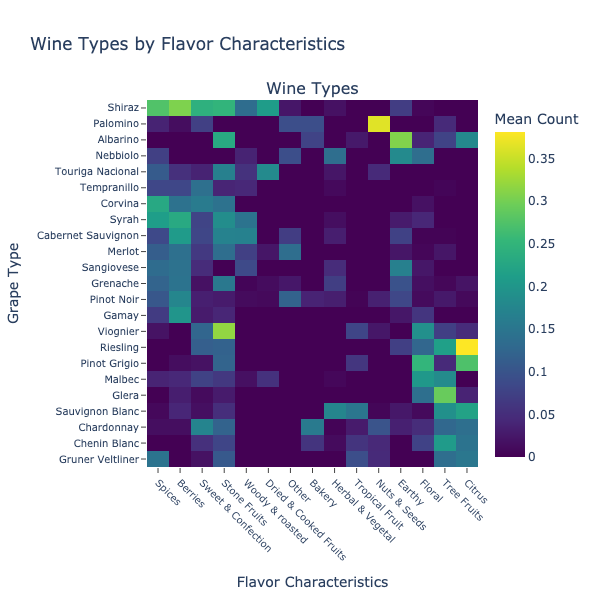

In [197]:

# plot the means
fig = make_subplots(rows=1, cols=1, subplot_titles=['Wine Types'])
fig.add_trace(
    go.Heatmap(
        # z=means,
        # z=means[row_order, :][:, col_order],
        z=means_sorted,
        # z=means[row_order, :],
        x=means_sorted.columns,
        y=means_sorted.index,
        colorscale='Viridis',
        colorbar=dict(title='Mean Count'),
        hovertemplate='%{x}: %{y}<br>Count: %{z}<extra></extra>'
    ),
    row=1, col=1
)
# decrease x and y axis tick labels
fig.update_xaxes(tickangle=45, tickfont=dict(size=10), ticks='outside')
fig.update_yaxes(tickfont=dict(size=10), ticks='outside')

fig.update_layout(
    title='Wine Types by Flavor Characteristics',
    xaxis_title='Flavor Characteristics',
    yaxis_title='Grape Type',
    height=600,
    width=600,
    template='plotly_white'
)
fig.show(renderer='png')

In [198]:
data_sorted_new = []
for i, grape_type in enumerate(grape_types_final):
    tmp = data_sorted[data_sorted['Grape_type'] == grape_type]

    Z = linkage(tmp[characteristics_unique_cols], 'ward')
    dendro = dendrogram(Z, no_plot=True)
    row_order = dendro["leaves"][::-1]
    # break
    tmp = tmp.iloc[row_order, :]
    
    # replace the original data_sorted with the sorted one
    data_sorted_new.append(tmp)
data_sorted = pd.concat(data_sorted_new, axis=0)

In [201]:

# loop through the flavors and hierarchically cluster the characteristics
data_sorted_new = []
for i, flavor in enumerate(flavors_final):
    chars = [char for char in flavors[flavor] if char in data_sorted.columns.to_list()]
    tmp = data_sorted[chars].copy()
    
    if tmp.shape[1] == 1:
        data_sorted_new.append(tmp.T)
        continue
    
    Z = linkage(tmp.T, 'ward')
    dendro = dendrogram(Z, no_plot=True)
    col_order = dendro["leaves"][::-1]
    tmp = tmp.iloc[:, col_order]
    
    # replace the original data_sorted with the sorted one
    data_sorted_new.append(tmp.T)
data_sorted_new = pd.concat(data_sorted_new).T
# flip horizontally
data_sorted_new = data_sorted_new.iloc[:, ::-1]
data_sorted_new

,Lemon,Lime,Grapefruit,Green Apple,Pear,Red Apple,Ripe Fruit,Floral,Violet,Blossom,...,Black Cherry,Blueberry,Gooseberry,Blackcurrant,Blackberry,Spice,Sweet Spice,Black Pepper,White Pepper,Liquorice
447,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
441,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
329,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,0
1107,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0
1194,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,0
78,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,0


In [159]:
data_sorted = data_sorted[data_sorted[characteristics_unique_cols].sum(axis=1)>0]

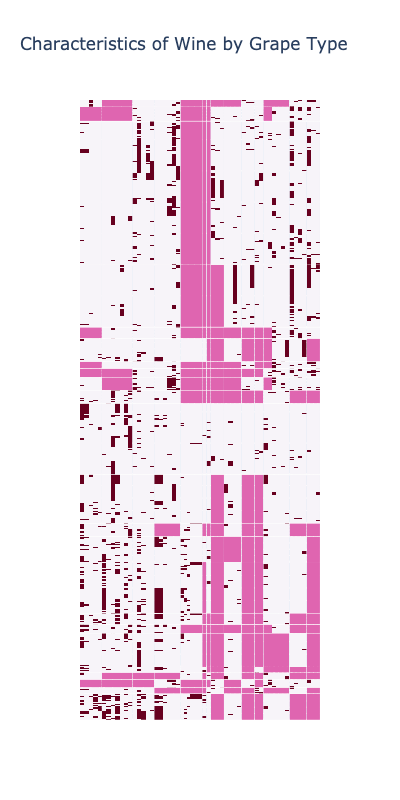

In [160]:
flavors_final = means_sorted.columns.tolist()
grape_types_final = means_sorted.index.tolist()

col_sizes = []
for j, flavor in enumerate(flavors_final):
    chars = [char for char in flavors[flavor] if char in characteristics_unique_cols]
    col_sizes.append(len(chars))

col_sizes = np.array(col_sizes)
col_sizes = col_sizes / col_sizes.sum()

row_heights = []
for i, grape_type in enumerate(grape_types_final):
    row_heights.append(data_sorted[data_sorted['Grape_type'] == grape_type].shape[0])
row_heights = np.array(row_heights)
row_heights = row_heights / row_heights.sum()

# # Use make_subplots to create a heatmap with the characteristics on the x-axis and the grape types on the y-axis
fig = make_subplots(
    rows=len(grape_types_final),
    row_heights=row_heights.tolist(),
    cols=len(flavors_final),
    column_widths=col_sizes.tolist(),
    # subplot_titles=characteristics_unique_cols,
    # shared_yaxes=True,
    vertical_spacing=0,
    horizontal_spacing=0
)

for i, grape_type in enumerate(grape_types_final):
    for j, flavor in enumerate(flavors_final):
        chars = [char for char in flavors[flavor] if char in characteristics_unique_cols]
        tmp = data_sorted[data_sorted['Grape_type'] == grape_type][chars]
        
        fig.add_trace(
            go.Heatmap(
                z=tmp.values,
                # x=tmp.columns,
                # y=[grape_type] * len(tmp),
                colorscale='PuRd',
                showscale=False
            ),
            row=i + 1,
            col=j + 1
        )
        # no x axis labels or ticks
        fig.update_xaxes(
            row=i + 1,
            col=j + 1,
            showticklabels=False,
            ticks=''
        )
        fig.update_yaxes(
            row=i + 1,
            col=j + 1,
            showticklabels=False,
            ticks=''
        )
        
fig.update_layout(
    title="Characteristics of Wine by Grape Type",
   width=400,
   height=800
)
fig.update_xaxes(side="top")
fig.show(renderer='png')

# heatmaps

In [120]:
# loop through the grape types and flavors, get the percentage of wines of that grape type that have that flavor
results = []
for grape_type in grape_types.index:
    tmp = data[data['Grape_type'] == grape_type]
    for category, flavors_i in flavors.items():
        for i in flavors_i:
            if i not in characteristics_unique:
                continue
            cnt = float((tmp[i].sum() / len(tmp)))
            results.append({
                'Grape_type': grape_type,
                'Flavor': category,
                'Characteristic': i,
                'Percentage': cnt
            })
results = pd.DataFrame(results)
results

,Grape_type,Flavor,Characteristic,Percentage
0,Chardonnay,Berries,Blackcurrant,0.000000
1,Chardonnay,Berries,Redcurrant,0.000000
2,Chardonnay,Berries,Blueberry,0.000000
3,Chardonnay,Berries,Raspberry,0.063291
4,Chardonnay,Berries,Blackberry,0.000000
...,...,...,...,...
2272,Nebbiolo,Earthy,Wet Stones,0.000000
2273,Nebbiolo,Earthy,Flint,0.000000
2274,Nebbiolo,Earthy,Mineral,0.000000
2275,Nebbiolo,Other,Savoury,0.090909


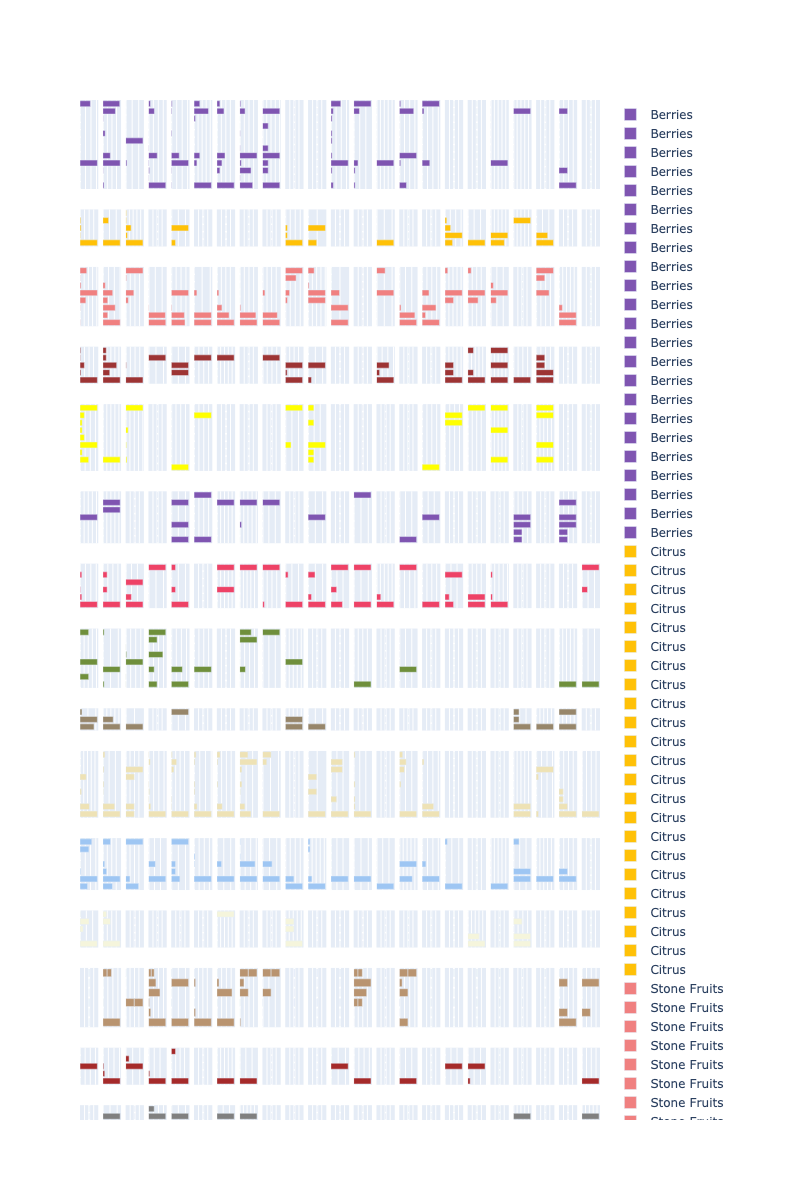

In [121]:
row_heights = []
for j, flavor in enumerate(flavors):
    chars = [char for char in results['Characteristic'].tolist() if char in flavors[flavor]]
    row_heights.append(len(chars))
row_heights = np.array(row_heights)
row_heights = row_heights / row_heights.sum()

# plot horizontal bar chart foreach grape type and flavor
fig = make_subplots(
    rows=len(flavors),
    row_heights=row_heights.tolist(),
    cols=len(grape_types),
    # shared_xaxes=True,
    vertical_spacing=0.02,
    # subplot_titles=grape_types
)

for i, flavor in enumerate(flavors):
    for j, grape_type in enumerate(grape_types.index):
        tmp = results[(results['Grape_type'] == grape_type) & (results['Characteristic'].isin(flavors[flavor]))]

        fig.add_trace(
            go.Bar(
                x=tmp['Percentage'],
                y=tmp['Characteristic'],
                orientation='h',
                name=flavor,
                marker_color=category_colors.get(flavor, 'gray'),
                # hovertemplate='%{y}: %{x:.2f}%<extra></extra>'
            ),
            row=i + 1,
            col=j + 1
        )
        fig.update_xaxes(
            row=i + 1,
            col=j + 1,
            showticklabels=False,
            ticks=''
        )
        fig.update_yaxes(
            row=i + 1,
            col=j + 1,
            showticklabels=False,
            ticks=''
        )

fig.show(renderer='png', height=1200, width=800)

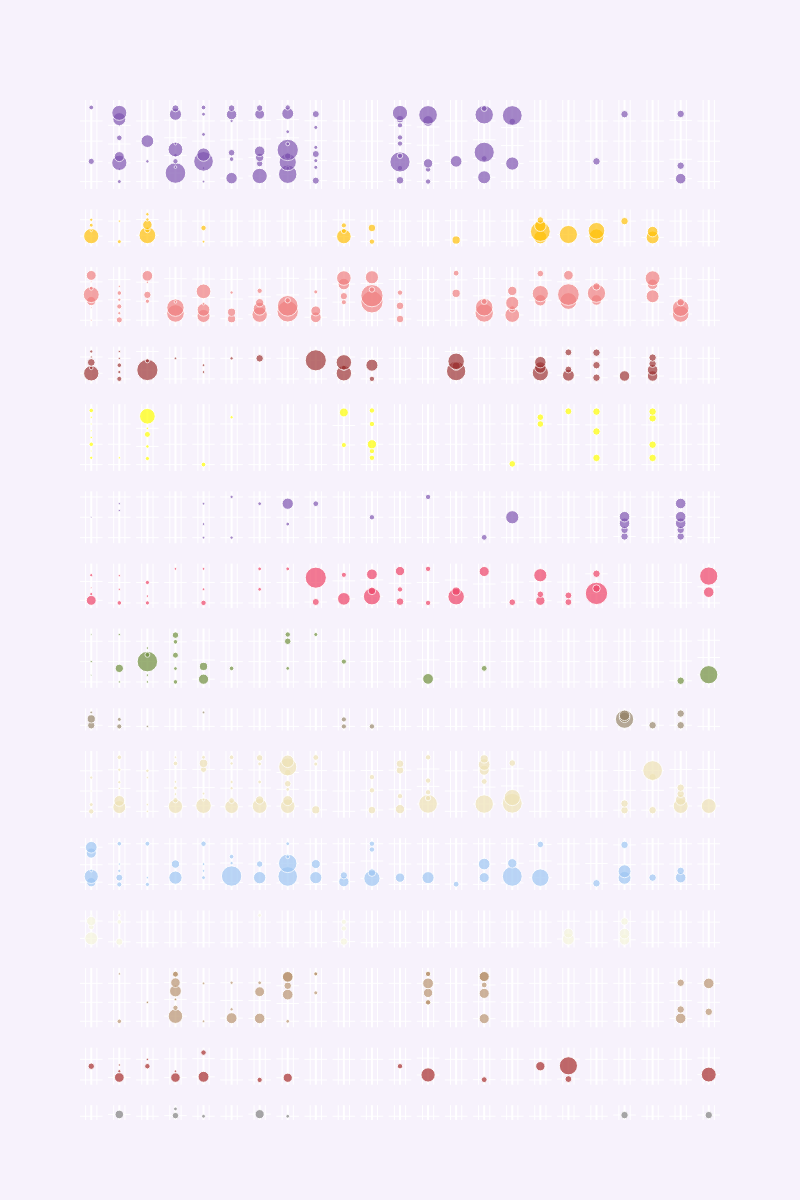

In [123]:
row_heights = []
for j, flavor in enumerate(flavors):
    chars = [char for char in results['Characteristic'].tolist() if char in flavors[flavor]]
    row_heights.append(len(chars))
row_heights = np.array(row_heights)
row_heights = row_heights / row_heights.sum()

# plot horizontal bar chart foreach grape type and flavor
fig = make_subplots(
    rows=len(flavors),
    row_heights=row_heights.tolist(),
    cols=len(grape_types),
    # shared_xaxes=True,
    vertical_spacing=0.02,
    # subplot_titles=grape_types
)

for i, flavor in enumerate(flavors):
    for j, grape_type in enumerate(grape_types.index):
        tmp = results[(results['Grape_type'] == grape_type) & (results['Characteristic'].isin(flavors[flavor]))]

        fig.add_trace(
            go.Scatter(
                x=[0] * len(tmp),  # x is a dummy value for the scatter plot
                y=tmp['Characteristic'],
                mode='markers',
                name=flavor,
                marker=dict(
                    color=category_colors.get(flavor, 'gray'),
                    size=tmp['Percentage']/2,
                    sizemode='area',
                    sizeref=2 * 1 / 35**2
                ),
                # hovertemplate='%{y}: %{x:.2f}%<extra></extra>'
            ),
            row=i + 1,
            col=j + 1
        )
        fig.update_xaxes(
            row=i + 1,
            col=j + 1,
            showticklabels=False,
            ticks=''
        )
        fig.update_yaxes(
            row=i + 1,
            col=j + 1,
            showticklabels=False,
            ticks=''
        )

fig.update_layout(
    showlegend=False,
    paper_bgcolor="#f7f2fc",
    plot_bgcolor='#f7f2fc',
)

fig.show(renderer='png', height=1200, width=800)

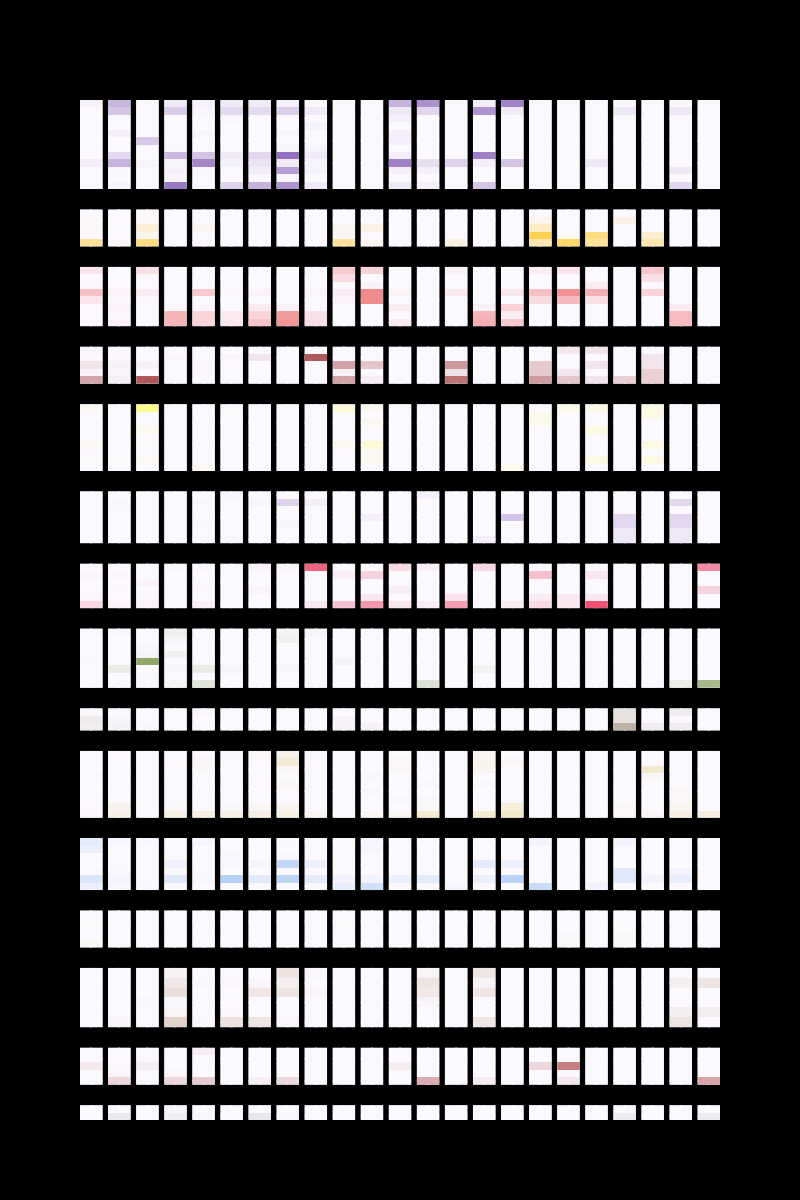

In [129]:
row_heights = []
for j, flavor in enumerate(flavors):
    chars = [char for char in results['Characteristic'].tolist() if char in flavors[flavor]]
    row_heights.append(len(chars))
row_heights = np.array(row_heights)
row_heights = row_heights / row_heights.sum()

# plot horizontal bar chart foreach grape type and flavor
fig = make_subplots(
    rows=len(flavors),
    row_heights=row_heights.tolist(),
    cols=len(grape_types),
    # shared_xaxes=True,
    vertical_spacing=0.02,
    # subplot_titles=grape_types
)

for i, flavor in enumerate(flavors):
    for j, grape_type in enumerate(grape_types.index):
        tmp = results[(results['Grape_type'] == grape_type) & (results['Characteristic'].isin(flavors[flavor]))]

        # Build custom colorscale: white at 0, category color at 1
        color = category_colors.get(flavor, 'gray')
        colorscale = [
            [0.0, "#fbf8fe"],
            [1.0, color]
        ]

        fig.add_trace(
            go.Heatmap(
                x=[0] * len(tmp),  # dummy x
                y=tmp['Characteristic'],
                z=tmp['Percentage'],
                zmin=0,
                zmax=0.9,
                colorscale=colorscale,
                colorbar=dict(title='Percentage') if (i == 0 and j == 0) else None,
                name=flavor,
                showscale=False
            ),
            row=i + 1,
            col=j + 1
        )
        fig.update_xaxes(
            row=i + 1,
            col=j + 1,
            showticklabels=False,
            ticks=''
        )
        fig.update_yaxes(
            row=i + 1,
            col=j + 1,
            showticklabels=False,
            ticks=''
        )

fig.update_layout(
    showlegend=False,
    paper_bgcolor='black',
    # paper_bgcolor="#f7f2fc",
    # plot_bgcolor='#f7f2fc',
)

fig.show(renderer='png', height=1200, width=800)

# bar plot

In [142]:
grape_types

Grape_type
Chardonnay            237
Pinot Noir            116
Sauvignon Blanc       102
Cabernet Sauvignon     87
Grenache               82
Tempranillo            56
Merlot                 44
Shiraz                 43
Malbec                 37
Chenin Blanc           23
Viognier               21
Gamay                  21
Sangiovese             21
Glera                  18
Syrah                  18
Corvina                14
Riesling               14
Albarino               13
Pinot Grigio           11
Palomino               11
Gruner Veltliner       11
Touriga Nacional       11
Nebbiolo               11
dtype: int64

In [143]:
# create a stacked bar chart. each bar is a grape type. each bar is the percentage of wines of that grape type that have that flavor

results = []
for grape_type in grape_types.index:
    tmp = data[data['Grape_type'] == grape_type]
    flavors_grape = []
    for flavor in flavors:
        chars = [char for char in flavors[flavor] if char in characteristics_unique_cols]
        cnt = tmp[chars].sum(axis=1).sum()
        flavors_grape.append(cnt)
    flavors_grape = np.array(flavors_grape)
    flavors_grape = flavors_grape / flavors_grape.sum()
    for i, flavor in enumerate(flavors):
        results.append({
            'Grape_type': grape_type,
            'Flavor': flavor,
            'Percent': flavors_grape[i]
        })
results = pd.DataFrame(results)
results

,Grape_type,Flavor,Percent
0,Chardonnay,Berries,0.027304
1,Chardonnay,Citrus,0.111490
2,Chardonnay,Stone Fruits,0.194539
3,Chardonnay,Tree Fruits,0.137656
4,Chardonnay,Tropical Fruit,0.022753
...,...,...,...
340,Nebbiolo,Sweet & Confection,0.000000
341,Nebbiolo,Bakery,0.000000
342,Nebbiolo,Woody & roasted,0.086957
343,Nebbiolo,Earthy,0.173913


In [144]:
# pivot the results DataFrame to get the percentage of wines by grape type and flavor
results_pivot = results.pivot(index='Grape_type', columns='Flavor', values='Percent').fillna(0)
results_pivot

# cluster by grape type
Z = linkage(results_pivot, 'ward')
dendro = dendrogram(Z, no_plot=True)
row_order = dendro["leaves"][::-1]
results_pivot = results_pivot.iloc[row_order, :]

# sort grape types by the order in results_pivot
results['Grape_type'] = pd.Categorical(results['Grape_type'], categories=results_pivot.index, ordered=True)

flavors_sorted = results_pivot.sum(axis=0).sort_values(ascending=False).index.to_list()
# sort 'Stone Fruits' first
flavors_sorted = ['Berries'] + [flavor for flavor in flavors_sorted if flavor != 'Berries']


results['Flavor'] = pd.Categorical(results['Flavor'], categories=flavors_sorted, ordered=True)
results = results.sort_values(by=['Grape_type', 'Flavor'])

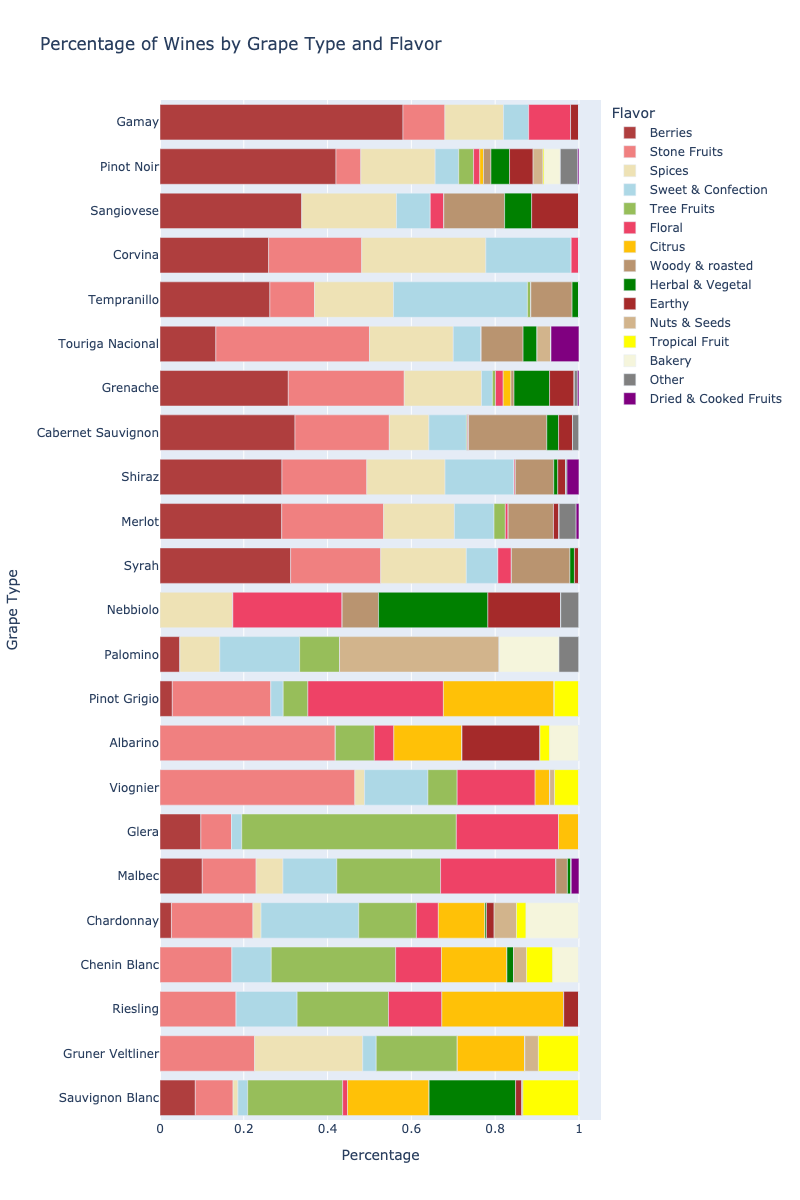

In [145]:
px.bar(
    results,
    y='Grape_type',
    x='Percent',
    color='Flavor',
    orientation='h',
    title='Percentage of Wines by Grape Type and Flavor',
    labels={'Grape_type': 'Grape Type', 'Percent': 'Percentage'},
    # color_discrete_sequence=px.colors.qualitative.Plotly
    color_discrete_map={
        'Citrus': '#FFC107',
        'Floral': '#EE4266',
        'Earthy': 'brown',
        'Nuts & Seeds': 'tan',
        'Tropical Fruit': 'yellow',
        'Herbal & Vegetal': 'green',
        'Bakery': 'beige',
        'Other': 'gray',
        'Dried & Cooked Fruits': 'purple',
        'Woody & roasted': '#B99470',
        'Stone Fruits': 'lightcoral',
        'Sweet & Confection': 'lightblue',
        'Spices': '#EEE2B5',
        'Berries': '#AF3E3E',
        'Tree Fruits': '#97BE5A'
    }
).show(renderer='png', width=800, height=1200)

In [ ]:
category_colors = {
    "Citrus": "#FFF9B0",               # pastel lemon yellow
    "Floral": "#FFD1F7",               # pastel lavender pink
    "Earthy": "#D8B4A6",               # pastel clay brown
    "Nuts & Seeds": "#EDE6D6",         # pastel beige
    "Tropical Fruit": "#FFEDBD",       # pastel mango
    "Herbal & Vegetal": "#C8E6C9",     # pastel mint green
    "Bakery": "#FFE8B2",               # pastel pastry peach
    "Other": "#E0E0E0",                # pastel light gray
    "Dried & Cooked Fruits": "#FFE2AA",# pastel apricot
    "Woody & roasted": "#D7CCC8",      # pastel taupe
    "Stone Fruits": "#FFD7BA",         # pastel coral
    "Sweet & Confection": "#FFCEE7",   # pastel candy pink
    "Spices": "#FFD8B1",               # pastel spice orange
    "Berries": "#E3C1FF",              # pastel lilac
    "Tree Fruits": "#D0F4DE",          # pastel pistachio
}